In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from os.path import join, expanduser, basename
# from invert import invert_sd, epsilon_density
from scipy.stats import pearsonr
import os

In [7]:
with open(expanduser(f'~/uavsar/results/uavsar_snotel_sd/res_df_v4'), 'rb') as f:
    res = pickle.load(f)
res_vv = res[res.pol == 'VV']
snow_off_vv = res_vv.dropna(subset = ['snow_off_phase'])

res_hh = res[res.pol == 'HH']
snow_off_hh = res_hh.dropna(subset = ['snow_off_phase'])
fig_dir = expanduser('~/uavsar/figures/snotel_uavsar_compare/')

NameError: name 'invert_sd' is not defined

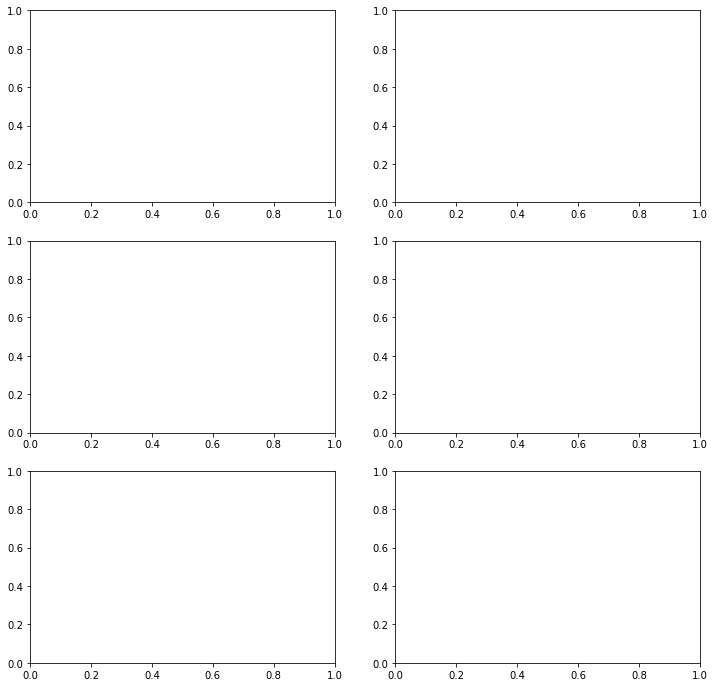

In [4]:
# locs_plt = {'stlake':[0,0],'grmesa':[0,1],'rockmt':[1,0],'lowman':[1,1],'uticam':[2,0],'sierra':[2,1],'alamos':[3,0],'silver':[3,1],'fraser':[4,0],'dorado':[4,1],'irnton':[5,0]}
locs_color = {'stlake':'red','grmesa':'blue','rockmt':'green','lowman':'purple','uticam':'grey','sierra':'black','alamos':'yellow','silver':'orange','fraser':'salmon','dorado':'lightblue','irnton':'darkred'}
locs_plt = {'stlake':[0,0],'grmesa':[0,1],'lowman':[1,0],'sierra':[1,1],'dorado':[2,0],'irnton':[2,1]}
locs_title = {'stlake':'St. Lake, UT','grmesa':'Grand Mesa, CO','lowman':'Lowman, ID','sierra':'Sierra, CA','dorado':'Dorado, CA','irnton':'Rocky Mountain NP, CO'}
f, axes = plt.subplots(3,2, figsize = (12,12))
for i,r in snow_off_vv.iterrows():
        loc = r['name'].split('_')[0]
        if loc in locs_plt.keys():
            if r.snotel_result:
                if r.h20_atmospheric_diff < 1:
                    for stat in r.snotel_result:
                        obs = r.snotel_result[stat]
                        sds = obs['SNOTEL:SNWD_H']
                        # temps = obs['SNOTEL:TOBS_H']
                        swes = obs['SNOTEL:WTEQ_H']
                        swe_delta = swes[-1] - swes[0]
                        # if swe_delta > 0:
                        sd_delta = sds[-1] - sds[0]
                        phase = obs['phase'] - r['snow_off_phase']
                        density = np.nanmean(swes) / np.nanmean(sds)
                        sd_us = invert_sd(phase, obs['inc'], epsilon = epsilon_density(density))
                        sd_us_mean = np.nanmean(sd_us)
                        swe_us_mean = density * sd_us_mean

                        cor_mean = np.nanmean(obs['cor'])
                        axes[locs_plt[loc][0],locs_plt[loc][1]].scatter(sd_delta, sd_us_mean, alpha = 0.4, color = locs_color[loc])
            if type(r.cdec_result) == dict:
                if r.h20_atmospheric_diff < 1:
                    for stat in r.cdec_result:
                        obs = r.cdec_result[stat]
                        if 'SNOWDEPTH' in obs.keys() and 'SWE' in obs.keys():
                            sds = obs['SNOWDEPTH']
                            # temps = obs['SNOTEL:TOBS_H']
                            swes = obs['SWE']
                            swe_delta = swes[-1] - swes[0]
                            # if swe_delta > 0:
                            sd_delta = sds[-1] - sds[0]
                            phase = obs['phase'] - r['snow_off_phase']
                            density = np.nanmean(swes) / np.nanmean(sds)
                            sd_us = invert_sd(phase, obs['inc'], epsilon = epsilon_density(density))
                            sd_us_mean = np.nanmean(sd_us)
                            swe_us_mean = density * sd_us_mean

                            cor_mean = np.nanmean(obs['cor'])
                            axes[locs_plt[loc][0],locs_plt[loc][1]].scatter(sd_delta, sd_us_mean, alpha = 0.4, color = locs_color[loc])
            axes[locs_plt[loc][0],locs_plt[loc][1]].set_title(locs_title[loc])

for ax2 in axes:
    for ax in ax2:
        ax.axhline(0, color = 'black', alpha = 0.3)
        ax.axvline(0, color = 'black', alpha = 0.3)
        n = 0.3
        ax.set_xlim(-n, n)
        ax.set_ylim(-n, n)

plt.suptitle('Snotel Snow Depth Change vs Uavsar Snow Depth Change')
axes[2,0].set_xlabel('Snotel Depth Change')
axes[2,1].set_xlabel('Snotel Depth Change')
axes[0,0].set_ylabel('Uavsar Depth Change')
axes[1,0].set_ylabel('Uavsar Depth Change')
axes[2,0].set_ylabel('Uavsar Depth Change')
plt.tight_layout()


In [ ]:
np.random.uniform(-0.01,.01,1)

array([-0.00862299])

0.3270232992474348

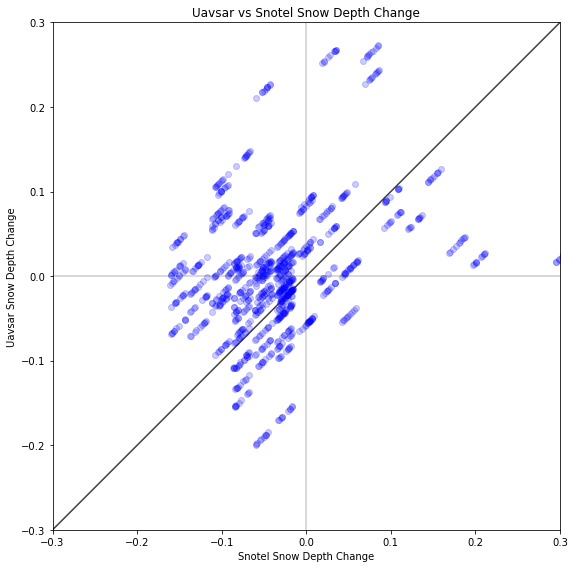

In [ ]:
f, ax = plt.subplots(figsize = (12,8))
xs = []
ys = []
test = pd.DataFrame()
for k in np.linspace(0.1, 3, 10):
    for i,r in snow_off_vv.iterrows():
        loc = r['name'].split('_')[0]
        if r.snotel_result:
            if r.h20_atmospheric_diff <1:
                for stat in r.snotel_result:
                    jitter = np.random.uniform(-0.01,.01,1)
                    obs = r.snotel_result[stat]
                    sds = obs['SNOTEL:SNWD_H']
                    # temps = obs['SNOTEL:TOBS_H']
                    swes = obs['SNOTEL:WTEQ_H']
                    swe_delta = swes[-1] - swes[0]
                    # if swe_delta > 0:
                    sd_delta = sds[-1] - sds[0]
                    phase = obs['phase'] - r['snow_off_phase']
                    density = np.nanmean(swes) / np.nanmean(sds)
                    sd_us = invert_sd(phase, obs['inc'], epsilon = epsilon_density(density))
                    sd_us_mean = np.nanmean(sd_us)
                    swe_us_mean = density * sd_us_mean

                    cor_mean = np.nanmean(obs['cor'])

                    plt.scatter(sd_delta + jitter, sd_us_mean + jitter, alpha = 0.2, color = 'blue')
                    xs.append(sd_delta)
                    ys.append(sd_us_mean)
        if type(r.cdec_result) == dict:
            if r.h20_atmospheric_diff <1:
                for stat in r.cdec_result:
                    jitter = np.random.uniform(-0.01,.01,1)
                    obs = r.cdec_result[stat]
                    if 'SNOWDEPTH' in obs.keys() and 'SWE' in obs.keys():
                        sds = obs['SNOWDEPTH']
                        # temps = obs['SNOTEL:TOBS_H']
                        swes = obs['SWE']
                        swe_delta = swes[-1] - swes[0]
                        # if swe_delta > 0:
                        sd_delta = sds[-1] - sds[0]
                        phase = obs['phase'] - r['snow_off_phase']
                        density = np.nanmean(swes) / np.nanmean(sds)
                        sd_us = invert_sd(phase, obs['inc'], epsilon = epsilon_density(density))
                        sd_us_mean = np.nanmean(sd_us)
                        swe_us_mean = density * sd_us_mean

                        cor_mean = np.nanmean(obs['cor'])
                        plt.scatter(sd_delta + jitter, sd_us_mean + jitter, alpha = 0.2, color = 'blue') # color = 'blue'
                        xs.append(sd_delta)
                        ys.append(sd_us_mean)
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel Snow Depth Change')
plt.ylabel('Uavsar Snow Depth Change')
ax.set_xlim((-0.3,0.3))
ax.set_ylim((-0.3,0.3))

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')

plt.savefig(join(fig_dir, 'vv_atmospheric_snow_off_modis_uavsar_snotel_cdec_sd_diff.png'))

ys = np.array(ys)
xs = np.array(xs)
xs_clean = xs[~np.isnan(xs) & ~np.isnan(ys)]
ys_clean = ys[~np.isnan(xs) & ~np.isnan(ys)]
plt.title('Uavsar vs Snotel Snow Depth Change')
plt.tight_layout()
pearsonr(xs_clean, ys_clean)[0]

/tmp/ipykernel_19054/3361492185.py:20: RuntimeWarning: Mean of empty slice
  sd_us_mean = np.nanmean(sd_us)


-0.06854725125645574

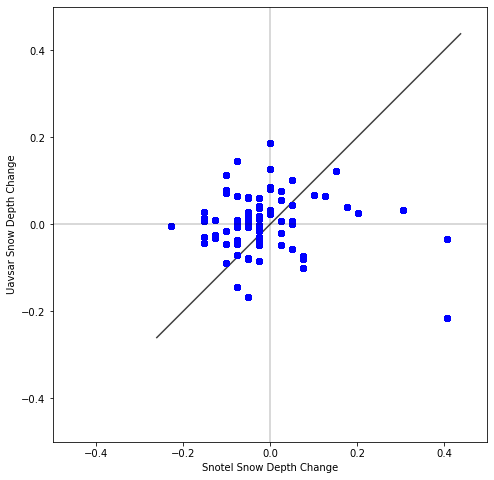

In [ ]:
f, ax = plt.subplots(figsize = (12,8))
xs = []
ys = []
test = pd.DataFrame()
for k in np.linspace(0.1, 3, 10):
    for i,r in snow_off_hh.iterrows():
        if r.snotel_result:
            if r.h20_atmospheric_diff <1:
                for stat in r.snotel_result:
                    obs = r.snotel_result[stat]
                    sds = obs['SNOTEL:SNWD_H']
                    # temps = obs['SNOTEL:TOBS_H']
                    swes = obs['SNOTEL:WTEQ_H']
                    swe_delta = swes[-1] - swes[0]
                    # if swe_delta > 0:
                    sd_delta = sds[-1] - sds[0]
                    phase = obs['phase'] - r['snow_off_phase']
                    density = np.nanmean(swes) / np.nanmean(sds)
                    sd_us = invert_sd(phase, obs['inc'], epsilon = epsilon_density(density))
                    sd_us_mean = np.nanmean(sd_us)
                    swe_us_mean = density * sd_us_mean

                    cor_mean = np.nanmean(obs['cor'])
                    plt.scatter(sd_delta, sd_us_mean, alpha = 1, color = 'blue')
                    xs.append(sd_delta)
                    ys.append(sd_us_mean)
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel Snow Depth Change')
plt.ylabel('Uavsar Snow Depth Change')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim((-0.5,0.5))
ax.set_ylim((-0.5,0.5))

plt.savefig(join(fig_dir, 'hh_atmospheric_snow_off_modis_uavsar_snotel_sd_diff.png'))

ys = np.array(ys)
xs = np.array(xs)
xs = xs[~np.isnan(ys)]
ys = ys[~np.isnan(ys)]
pearsonr(xs, ys)[0]

In [ ]:
test = pd.DataFrame()
xs = []
ys = []
for i,r in res.iterrows():
    if r.ulmo_result:
            for stat in r.ulmo_result:
                obs = r.ulmo_result[stat]
                sds = obs['SNOTEL:SNWD_H']
                # temps = obs['SNOTEL:TOBS_H']
                swes = obs['SNOTEL:WTEQ_H']
                swe_delta = swes[-1] - swes[0]
                # if swe_delta > 0:
                sd_delta = sds[-1] - sds[0]
                # phase = obs['phase'] - r['snow_off_phase']
                phase = obs['phase']
                density = np.nanmean(swes) / np.nanmean(sds)
                sd_us = invert_sd(phase, obs['inc'], epsilon = epsilon_density(density))
                sd_us_mean = np.nanmean(sd_us)
                swe_us_mean = density * sd_us_mean

                cor_mean = np.nanmean(obs['cor'])
                xs.append(sd_delta)
                ys.append(sd_us_mean)
                test = test.append({'pol':r.pol, 'number_nans':np.count_nonzero(np.isnan(phase)), 'cor':cor_mean}, ignore_index = True)
ys = np.array(ys)
xs = np.array(xs)
xs = xs[~np.isnan(ys)]
ys = ys[~np.isnan(ys)]
r = pearsonr(xs, ys)[0]

/tmp/ipykernel_19054/454084832.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append({'pol':r.pol, 'number_nans':np.count_nonzero(np.isnan(phase)), 'cor':cor_mean}, ignore_index = True)
/tmp/ipykernel_19054/454084832.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append({'pol':r.pol, 'number_nans':np.count_nonzero(np.isnan(phase)), 'cor':cor_mean}, ignore_index = True)
/tmp/ipykernel_19054/454084832.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test = test.append({'pol':r.pol, 'number_nans':np.count_nonzero(np.isnan(phase)), 'cor':cor_mean}, ignore_index = True)
/tmp/ipykernel_19054/454084832.py:24: FutureWarning: The frame.append method is deprecated and will be removed from panda

/tmp/ipykernel_17842/2440878372.py:11: RuntimeWarning: Mean of empty slice
  sd_us_mean = np.nanmean(sd_us)*0.2


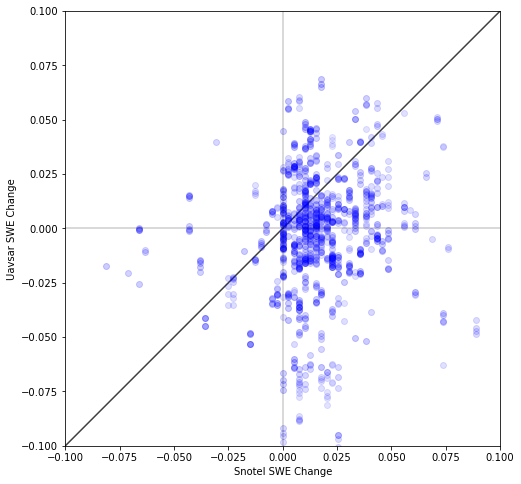

In [ ]:
f, ax = plt.subplots(figsize = (12,8))
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.ulmo_result:
            obs = r.ulmo_result[stat]
            sds = obs['SNOTEL:WTEQ_H']
            
            sd_delta = sds[-1] - sds[0]
            
            sd_us = invert_sd(obs['phase'], obs['inc'], epsilon = epsilon_density(0.2))
            sd_us_mean = np.nanmean(sd_us)*0.2

            cor_mean = np.nanmean(obs['cor'])
            plt.scatter(sd_delta, sd_us_mean, alpha = cor_mean/3, color = 'blue')
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel SWE Change')
plt.ylabel('Uavsar SWE Change')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim((-0.1,0.1))
ax.set_ylim((-0.1,0.1))

plt.savefig(join(fig_dir, 'uavsar_snotel_swe_diff.png'))

AttributeError: 'Series' object has no attribute 'ulmo_result'

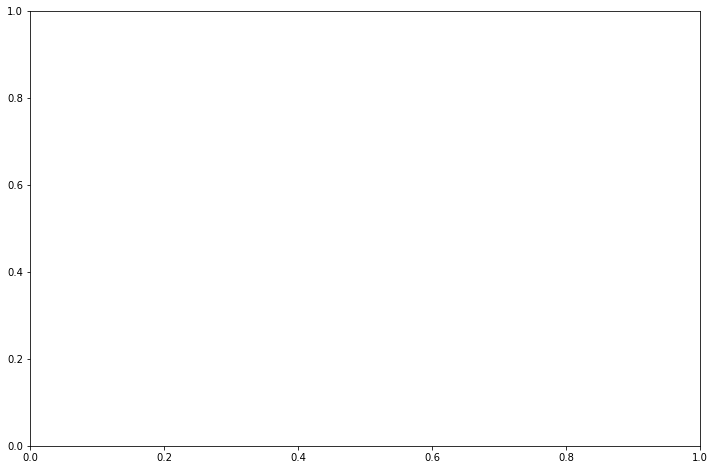

In [9]:
f, ax = plt.subplots(figsize = (12,8))
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.snotel_result:
            obs = r.snotel_result[stat]
            sds = obs['SNOTEL:SNWD_H']
            
            sd_delta = sds[-1] - sds[0]
            
            sd_us = invert_sd(obs['phase'], obs['inc'], epsilon = epsilon_density(0.2))
            sd_us_mean = np.nanmean(sd_us)

            cor_mean = np.nanmean(obs['cor'])
            plt.scatter(sd_delta, sd_us_mean, alpha = cor_mean/3, color = 'blue')
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel Snow Depth Change')
plt.ylabel('Uavsar Snow Depth Change')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim((-0.5,0.5))
ax.set_ylim((-0.5,0.5))

plt.savefig(join(fig_dir, 'uavsar_snotel_sd_diff.png'))

In [14]:
with open(expanduser(f'~/uavsar/results/uavsar_snotel_sd/res_df_v3'), 'rb') as f:
    res = pickle.load(f)

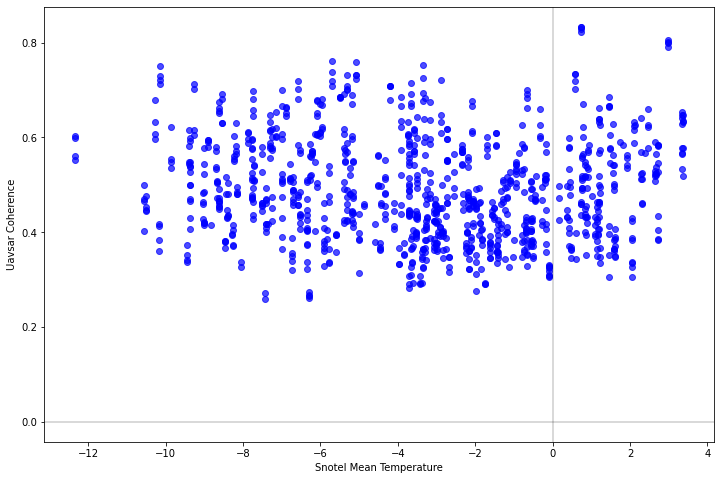

In [15]:
f, ax = plt.subplots(figsize = (12,8))
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.ulmo_result:
            obs = r.ulmo_result[stat]
            temps = obs['SNOTEL:TOBS_H']
            mean_temp = np.nanmean(temps)
            sds = obs['SNOTEL:SNWD_H']


            cor_mean = np.nanmean(obs['cor'])
            if np.nanmin(sds) > 0.1:
                plt.scatter(mean_temp, cor_mean, alpha = 0.7, color = 'blue')
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel Mean Temperature')
plt.ylabel('Uavsar Coherence')
plt.savefig(join(fig_dir, 'coh_snotel_mean_temp.png'))

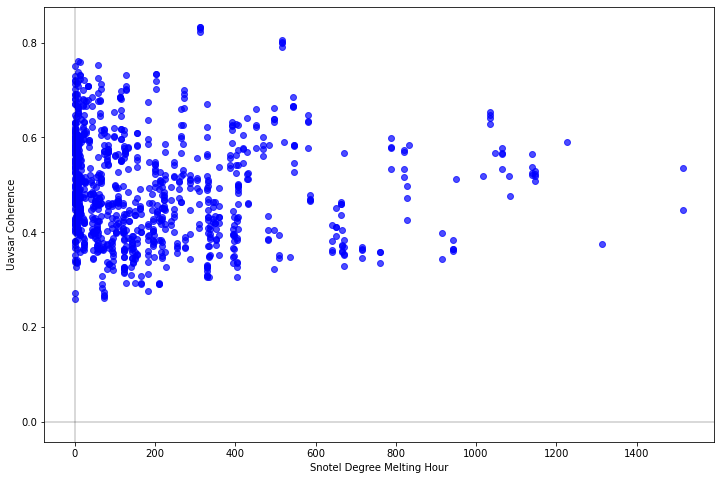

In [ ]:
f, ax = plt.subplots(figsize = (12,8))
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.ulmo_result:
            obs = r.ulmo_result[stat]
            temps = obs['SNOTEL:TOBS_H']
            dmh = np.nansum(temps[temps > 0])
            sds = obs['SNOTEL:SNWD_H']

            cor_mean = np.nanmean(obs['cor'])
            if np.nanmin(sds) >0:
                plt.scatter(dmh, cor_mean, alpha = 0.7, color = 'blue')
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel Degree Melting Hour')
plt.ylabel('Uavsar Coherence')
plt.savefig(join(fig_dir, 'coh_snotel_melt_degree_hour.png'))

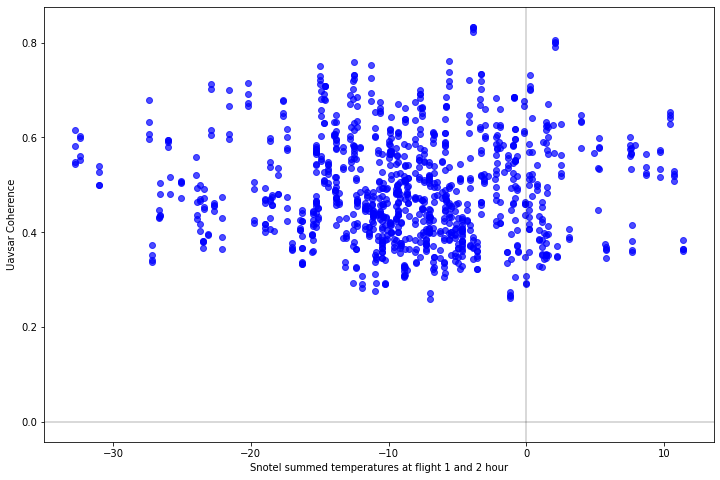

In [ ]:
f, ax = plt.subplots(figsize = (12,8))
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.ulmo_result:
            obs = r.ulmo_result[stat]
            temps = obs['SNOTEL:TOBS_H']
            sum_flight_temps = temps[0] + temps[-1]
            sds = obs['SNOTEL:SNWD_H']

            cor_mean = np.nanmean(obs['cor'])
            if np.nanmin(sds) >0:
                plt.scatter(sum_flight_temps, cor_mean, alpha = 0.7, color = 'blue')
# plt.xlim(-0.5, 0.5)
# plt.ylim(-1, 1)
plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel summed temperatures at flight 1 and 2 hour')
plt.ylabel('Uavsar Coherence')
plt.savefig(join(fig_dir, 'coh_snotel_summed_flight_temps.png'))

In [22]:
from scipy import stats
def clean_nps(arrs):
    idx = np.zeros_like(arrs[0], dtype = arrs[0].dtype)
    for arr in arrs:
        idx += arr

    for i in range(len(arrs)):
        arrs[i] = arrs[i][np.where(~np.isnan(idx))]
    return arrs

def clean_two_nps(arr1, arr2):
    buff = arr1
    arr1 = arr1[(~np.isnan(arr1)) & (~np.isnan(arr2))]
    arr2 = arr2[(~np.isnan(buff)) & (~np.isnan(arr2))]
    return arr1, arr2

def datarray_to_numpy(x, y):
    if type(x)== xr.core.dataarray.DataArray:
        x_dirty = x.values.ravel()
        y = y.values.ravel()
    else:
        x_dirty = x
    x = x_dirty[(~np.isnan(x_dirty)) & (~np.isnan(y))]
    y = y[(~np.isnan(x_dirty)) & (~np.isnan(y))]
    return x, y

def r2_value(x, y):
    # x, y = datarray_to_numpy(x,y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(f'slope: {slope}. intercept: {intercept}. r_value {r_value}. p value: {p_value}')
    return slope, intercept, r_value, p_value, x, y

def mann_test(x, y, xlabel = 'x', ylabel = 'y'):
    x, y = datarray_to_numpy(x,y)
    stat, p = mannwhitneyu(x, y)   
    print(f'Comparison of {xlabel} vs {ylabel} center has a p value of {p:.10f} of not being from same distribution with {len(x)} observations.')
    if p < 0.1:
        print(f'Median of {xlabel}: {np.median(x)} compared to median of {ylabel}: {np.median(y)}')

slope: -0.08987428102505675. intercept: 0.49018493767278326. r_value -0.10084053745258244. p value: 0.0011472061682393927


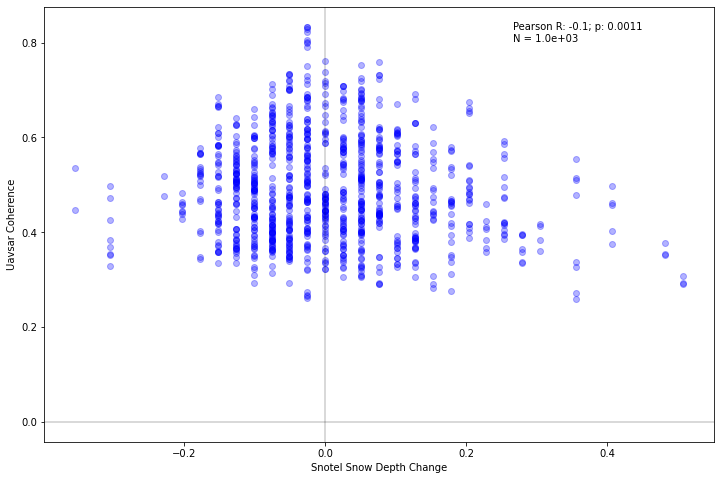

In [30]:
xs = []
ys = []
f, ax = plt.subplots(figsize = (12,8))
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.ulmo_result:
            obs = r.ulmo_result[stat]
            temps = obs['SNOTEL:TOBS_H']
            mean_temp = np.nanmean(temps)
            sds = obs['SNOTEL:SNWD_H']
            sd_delta = sds[-1] - sds[0]

            cor_mean = np.nanmean(obs['cor'])
            # if np.nanmin(sds) >0:
            plt.scatter(sd_delta, cor_mean, alpha = 0.3, color = 'blue')
            xs.append(sd_delta)
            ys.append(cor_mean)
_,_,r,p,_,_ = r2_value(xs,ys)

plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel Snow Depth Change')
plt.ylabel('Uavsar Coherence')
n = len(xs)
plt.annotate(text = f'Pearson R: {r:.2}; p: {p:.2}\nN = {n:.1e}', xy = [0.7,0.92], xycoords = 'axes fraction')
plt.savefig(join(fig_dir, 'coh_snotel_sd_delta-v2.png'))

slope: -0.03828338018372815. intercept: 0.5340962874449394. r_value -0.1413630392878346. p value: 4.883836095701981e-06


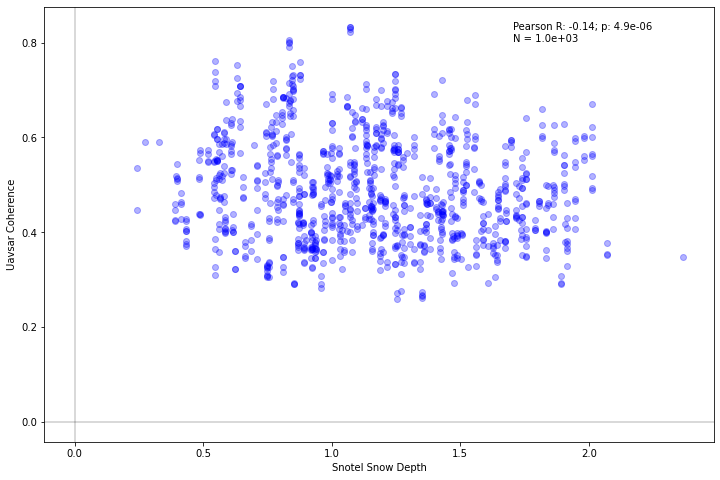

In [29]:
xs = []
ys = []
f, ax = plt.subplots(figsize = (12,8))
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.ulmo_result:
            obs = r.ulmo_result[stat]
            temps = obs['SNOTEL:TOBS_H']
            mean_temp = np.nanmean(temps)
            sds = obs['SNOTEL:SNWD_H']
            sd_mean = np.nanmean(sds)
            # sd_delta = sds[-1] - sds[0]

            cor_mean = np.nanmean(obs['cor'])
            if np.nanmin(sds) >0:
                plt.scatter(sd_mean, cor_mean, alpha = 0.3, color = 'blue')
                xs.append(sd_mean)
                ys.append(cor_mean)
_,_,r,p,_,_ = r2_value(xs,ys)

plt.axhline(0, color = 'black', alpha = 0.2)
plt.axvline(0, color = 'black', alpha = 0.2)
plt.xlabel('Snotel Snow Depth')
plt.ylabel('Uavsar Coherence')
n = len(xs)
plt.annotate(text = f'Pearson R: {r:.2}; p: {p:.2}\nN = {n:.1e}', xy = [0.7,0.92], xycoords = 'axes fraction')
plt.savefig(join(fig_dir, 'coh_snotel_sd-v2.png'))

In [ ]:
lm_df = pd.DataFrame()
for i,r in res.iterrows():
    if r.ulmo_result:
        for stat in r.ulmo_result:
            d = {}
            obs = r.ulmo_result[stat]
            temps = obs['SNOTEL:TOBS_H']
            d['mean_temp'] = np.nanmean(temps)    
            d['sum_flight_temps'] = temps[0] + temps[-1]
            d['dmh'] = np.nansum(temps[temps > 0]) 
            sds = obs['SNOTEL:SNWD_H']
            d['mean_sd'] = np.nanmean(sds) 
            d['snotel_delta_sd'] = sds[-1] - sds[0]  
            swes = obs['SNOTEL:WTEQ_H']
            d['mean_swe'] = np.nanmean(swes)
            d['snotel_delta_swe'] = swes[-1] - swes[0] 
            sd_us = invert_sd(obs['phase'], obs['inc'], epsilon = epsilon_density(0.2))
            d['uavsar_delta_sd'] = np.nanmean(sd_us)

            d['cor_mean'] = np.nanmean(obs['cor'])
            pd.DataFrame.from_dict([d])
            lm_df = pd.concat([lm_df, pd.DataFrame.from_dict([d])])

/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: Mean of empty slice
  d['uavsar_delta_sd'] = np.nanmean(sd_us)
/tmp/ipykernel_26134/3472181217.py:18: RuntimeWarning: M

In [ ]:
from sklearn.model_selection import train_test_split
X = lm_df[['mean_temp','mean_sd','snotel_delta_sd','mean_swe','snotel_delta_swe']]
y = lm_df.cor_mean
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


m = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
m.fit(X, y)
print(f'Train accuray {m.score(X,y)}')

print(f'Test accuray {m.score(X_test,y_test)}')

Train accuray 0.1661781065537994
Test accuray 0.21168630741290817


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = train[['mean_temp','mean_sd','snotel_delta_sd','mean_swe','snotel_delta_swe']]
y = train.cor_mean > 0.5

m = make_pipeline(StandardScaler(with_mean=False), RandomForestRegressor(max_depth=2))
m.fit(X, y)
print(f'Train accuray {m.score(X,y)}')
X_test = test[['mean_temp','mean_sd','snotel_delta_sd','mean_swe','snotel_delta_swe']]
y_test = test.cor_mean > 0.5
print(f'Test accuray {m.score(X_test,y_test)}')

Train accuray 0.17783626850833179
Test accuray 0.1636810928654946


In [ ]:
m[:-1].get_feature_names_out()

array(['mean_temp', 'mean_sd', 'snotel_delta_sd', 'mean_swe',
       'snotel_delta_swe'], dtype=object)

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
forest = m['randomforestregressor']
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=m[:-1].get_feature_names_out())

/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without featur

Elapsed time to compute the importances: 2.640 seconds


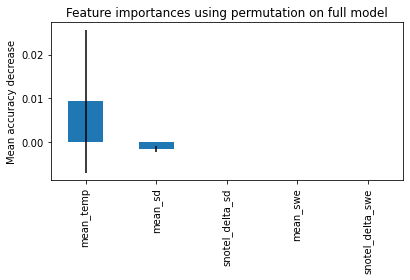

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Classifier

In [ ]:
from sklearn.model_selection import train_test_split
X = lm_df[['mean_temp','mean_sd','snotel_delta_sd','mean_swe','snotel_delta_swe']]
feature_names = ['mean_temp','mean_sd','snotel_delta_sd','mean_swe','snotel_delta_swe']
y = lm_df.cor_mean > 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


m = make_pipeline(StandardScaler(with_mean=False), RandomForestClassifier(max_depth=2))
m.fit(X, y)
print(f'Train accuray {m.score(X,y)}')

print(f'Test accuray {m.score(X_test,y_test)}')

Train accuray 0.7270973963355835
Test accuray 0.7192307692307692


In [ ]:
import time
import numpy as np

start_time = time.time()
forest = m['randomforestclassifier']
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.008 seconds


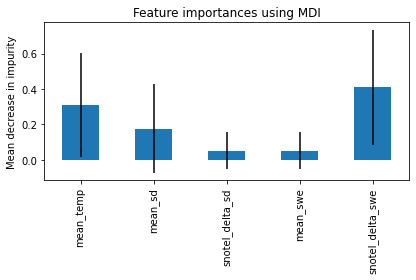

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=m.feature_names_in_)

/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without f

Elapsed time to compute the importances: 0.281 seconds


/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/bsuhome/zacharykeskinen/miniconda3/envs/proj/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without f

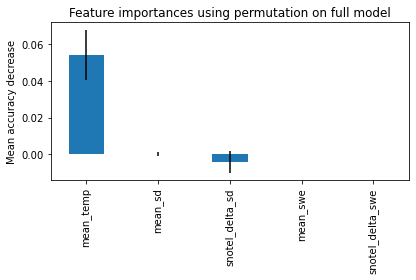

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()